In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
# Loading the dataset
tr = pd.read_csv(r'D:\Materials\Materials  o6u\LEVEL 3 AI Specialization\Semester 1\AI\Final Project\WA_Fn-UseC_-Telco-Customer-Churn.csv')
tr

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<Axes: >

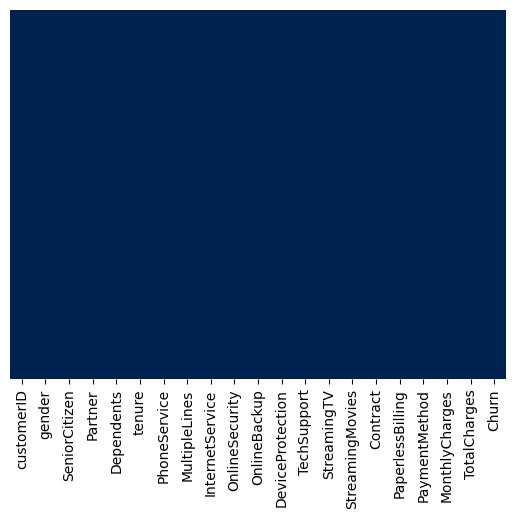

In [85]:
# ploting the dataset to show if there is null values in the features or not, blue mean non null and yellow is null
# but showing this plot mean the dataset doesn't have null values in all features
sns.heatmap(tr.isnull(),yticklabels= False,cbar=False,cmap='cividis')

In [86]:
# shows The columns in the dataframe and the number of entries (rows ) and their indices and shows the type of each column and number of Null value and Non-Null
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [87]:
# after searching in the dataset we discoved that some TotalCharges values is ' ' white space that is why is still object 
# not float, so we have to remove this rows that contain this value in TotalCharges in order not to cause problems later 

# drop rows with with ' ' white space value 
df = tr.drop(tr[tr['TotalCharges'] == ' '].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [88]:
# Convert 'TotalCharges' from object (string) to 'float' for numerical analysis and check DataFrame structure
df = df.astype({'TotalCharges':'float'})
df.info()  # Displays DataFrame info to confirm the data type change and overall DataFrame structure

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [89]:
# Shows that the index of the data frame still the same after dropping the rows of TotalCharges
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [90]:
# Shows that the index of the data frame still the same after dropping the rows of TotalCharges
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [91]:
# Reset and clean up DataFrame index after dropping rows
df = df.reset_index(drop=True)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Data Visualization

## Gender Percent

<Axes: xlabel='gender', ylabel='percent'>

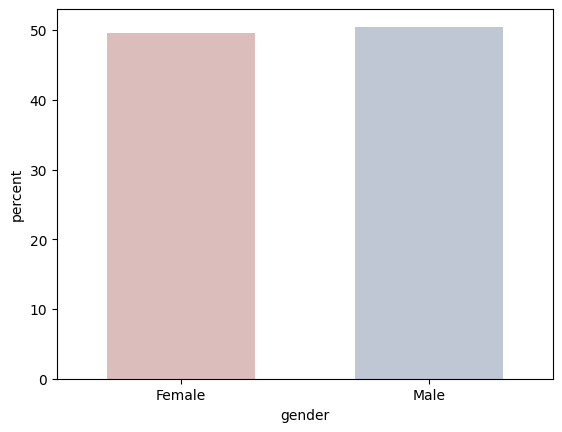

In [92]:
# Gender Distribution: Visualize the percentage distribution of genders in the dataset
sns.countplot(x="gender", data=tr, palette="vlag_r", hue="gender", stat='percent', width=0.6)

# Churn Percent

<Axes: xlabel='Churn', ylabel='percent'>

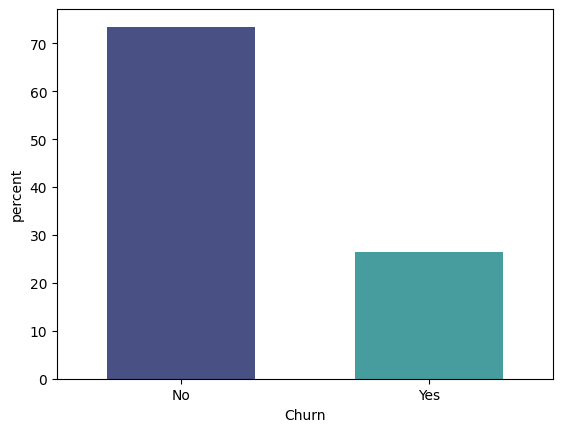

In [12]:
# Churn Distribution: Show the percentage of churned vs non-churned customers
sns.countplot(x="Churn", data=tr, palette="mako", hue="Churn", stat='percent', width=0.6)

## Churn Distribution w.r.t gender

<Axes: xlabel='Churn', ylabel='percent'>

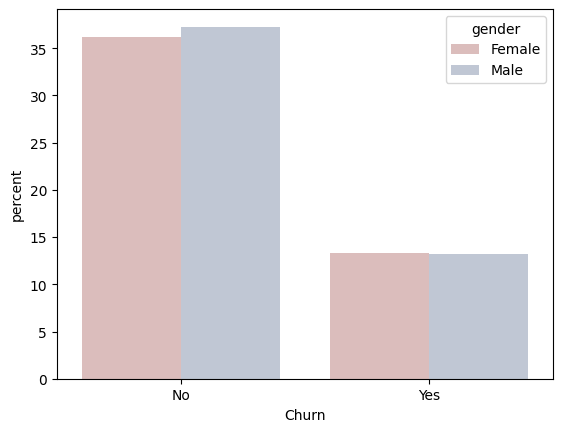

In [13]:
# Churn by Gender: Compare churn percentages between different genders
sns.countplot(x="Churn", data=tr, palette="vlag_r", legend=True, hue="gender", stat='percent')

## SeniorCitizen Percent

<Axes: xlabel='SeniorCitizen', ylabel='percent'>

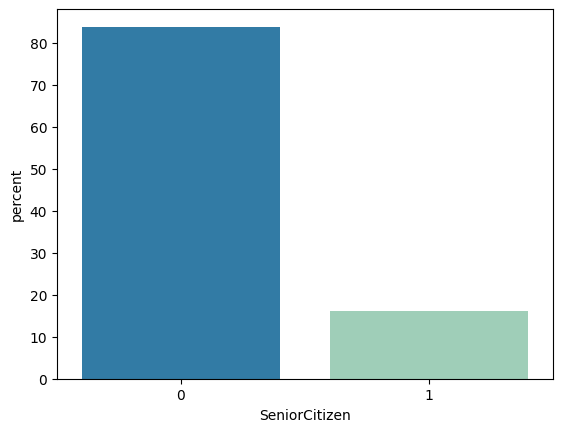

In [14]:
# Senior Citizen Distribution: Display the percentage of senior citizens vs non-senior citizens
sns.countplot(x="SeniorCitizen", data=tr, palette="YlGnBu_r", legend=False, hue="SeniorCitizen", stat='percent')

## Churn Distribution w.r.t SeniorCitizen

<Axes: xlabel='Churn', ylabel='percent'>

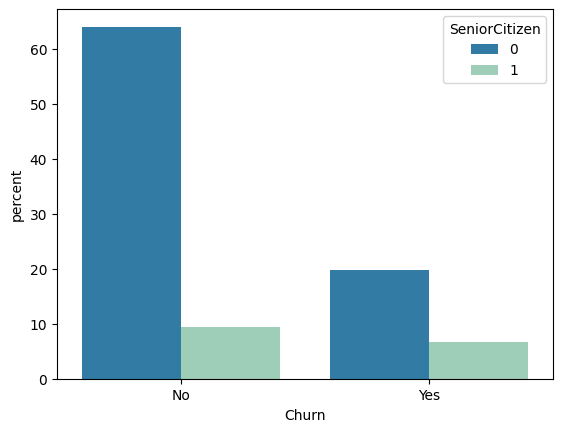

In [15]:
# Churn by Senior Citizen: Analyze churn percentages among senior citizens and non-senior citizens
sns.countplot(x="Churn", data=tr, palette="YlGnBu_r", legend=True, hue="SeniorCitizen", stat='percent')

## Dependents Percent

<Axes: xlabel='Dependents', ylabel='percent'>

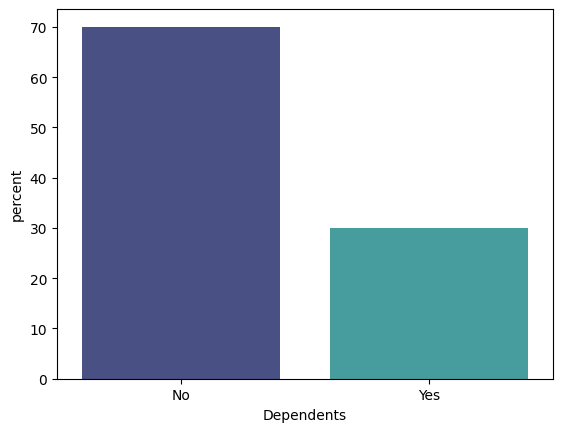

In [16]:
# Dependents Distribution: Show the percentage of customers with and without dependents
sns.countplot(x="Dependents", data=tr, palette="mako", legend=False, stat='percent', hue="Dependents")

## Churn Distribution w.r.t Dependents

<Axes: xlabel='Churn', ylabel='percent'>

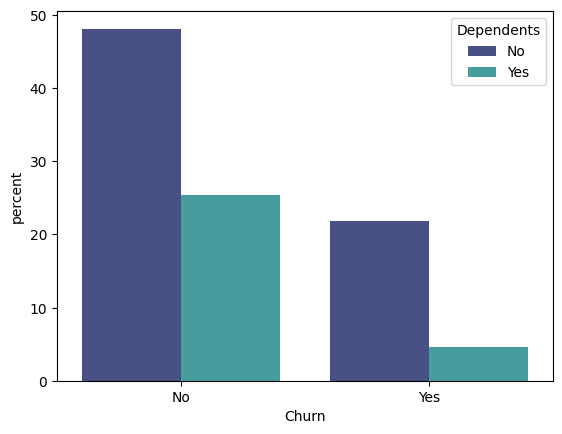

In [17]:
# Visualize the percentage of churn categorized by whether customers have dependents or not.
sns.countplot(x = "Churn", data = tr, palette = "mako", legend = True, stat = 'percent', hue = "Dependents")

## partner percent

<Axes: xlabel='Partner', ylabel='percent'>

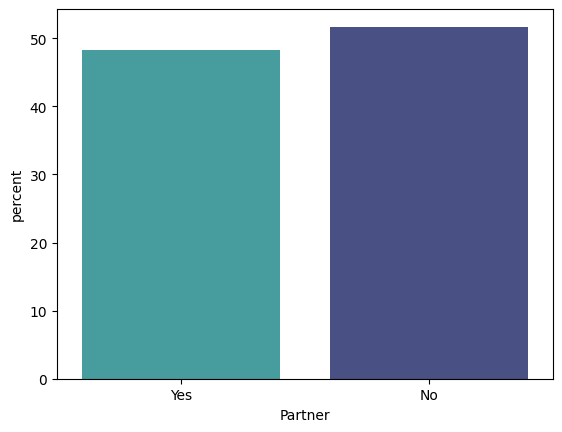

In [18]:
# visualize the percentage distribution of customers based on their 'Partner' status (having a partner or not).
sns.countplot(x="Partner", data=tr, palette="mako_r", legend=False, stat='percent', hue="Partner")

## Churn Distribution w.r.t partner percent

<Axes: xlabel='Churn', ylabel='percent'>

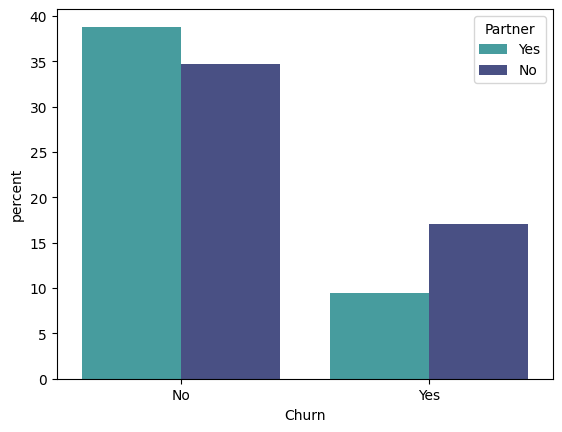

In [19]:
# This countplot shows the percentage of churned and non-churned customers, categorized by whether they have a partner.
sns.countplot(x="Churn", data=tr, palette="mako_r", legend=True, stat='percent', hue="Partner")

## Payment Method Percent

<Axes: xlabel='PaymentMethod', ylabel='percent'>

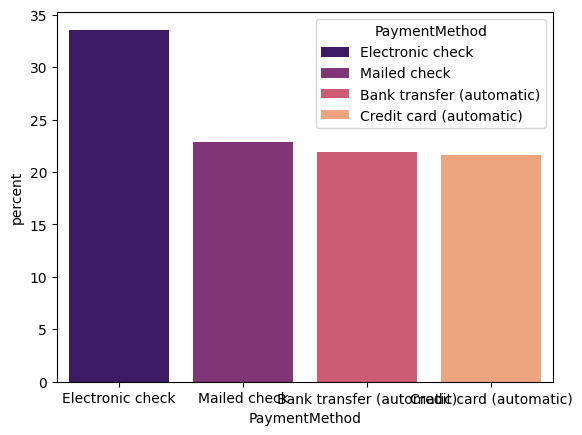

In [20]:
# Payment Method Distribution: Visualize the percentage of customers by payment method
sns.countplot(x="PaymentMethod", data=tr, palette="magma", legend=True, stat='percent', hue="PaymentMethod", native_scale=True)

## Churn Distribution w.r.t PaymentMethod

<Axes: xlabel='Churn', ylabel='count'>

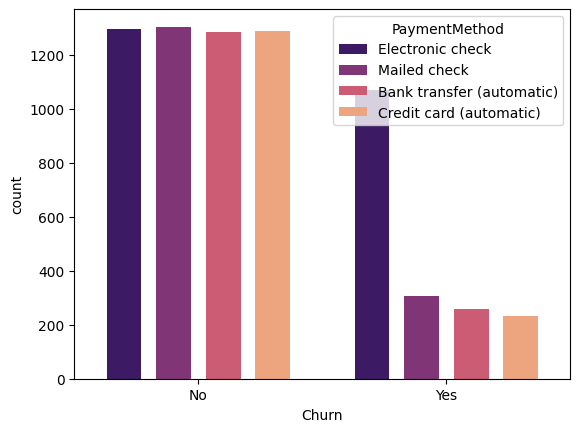

In [21]:
# Churn by Payment Method: Show count of churned and non-churned customers by payment method
sns.countplot(x="Churn", data=tr, palette="magma", legend=True, stat='count', hue="PaymentMethod", width=0.8, gap=1.7)

## Internet Service Percent

<Axes: xlabel='InternetService', ylabel='percent'>

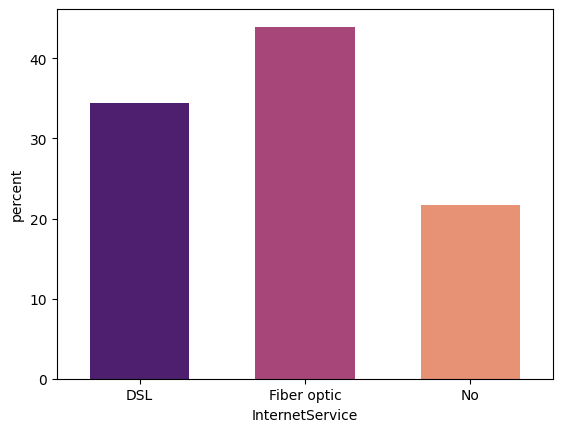

In [22]:
# Internet Service Distribution: Display the percentage of customers using different types of internet services
sns.countplot(x="InternetService", data=tr, palette="magma", hue="InternetService", stat='percent', width=0.6)

## Churn Distribution w.r.t InternetService

<Axes: xlabel='Churn', ylabel='count'>

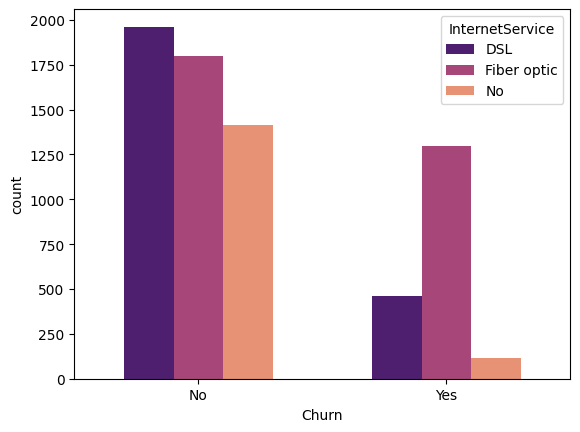

In [23]:
# Churn by Internet Service: Compare churn status among different internet service types
sns.countplot(x="Churn", data=tr, palette="magma", hue="InternetService", stat='count', width=0.6)

## Churn Distribution w.r.t OnlineSecurity

<Axes: xlabel='Churn', ylabel='count'>

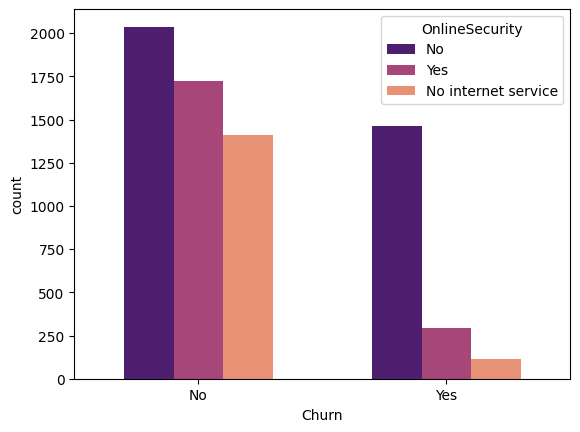

In [24]:
# displays the count of churned and non-churned customers, categorized by their Online Security service usage.
sns.countplot(x="Churn", data=tr, palette="magma", hue="OnlineSecurity", stat='count', width=0.6)

## Churn Distribution w.r.t Paperless Billing

<Axes: xlabel='Churn', ylabel='count'>

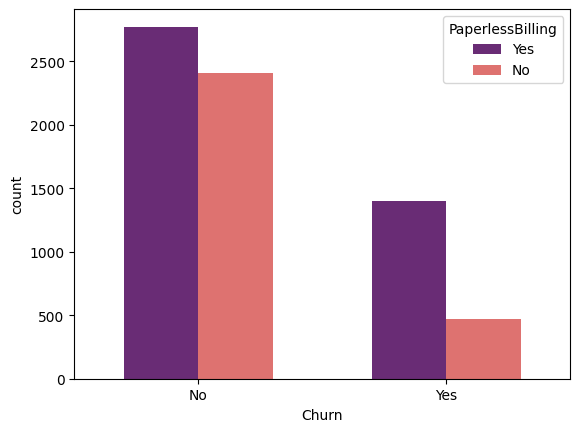

In [25]:
# Churn by Paperless Billing: Shows count of churned vs non-churned customers based on their paperless billing status.
sns.countplot(x="Churn", data=tr, palette="magma", hue="PaperlessBilling", stat='count', width=0.6)

## Churn Distribution w.r.t TechSupport

<Axes: xlabel='Churn', ylabel='count'>

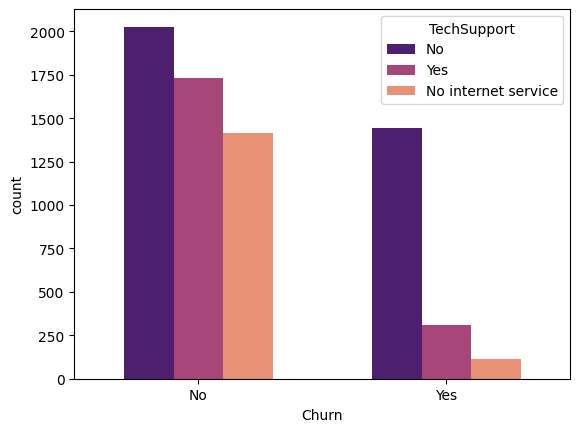

In [26]:
# Churn by Tech Support: Displays the count of churned and non-churned customers, categorized by their tech support usage.
sns.countplot(x="Churn", data=tr, palette="magma", hue="TechSupport", stat='count', width=0.6)

## Customers by Contract Type

<Axes: xlabel='Contract', ylabel='count'>

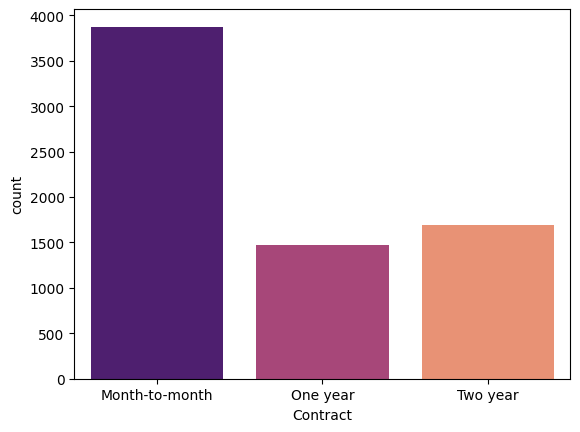

In [27]:
# Contract Type Distribution: Visualizes the count of different contract types in the dataset.
sns.countplot(x="Contract", data=tr, palette="magma", legend=False, stat='count', hue="Contract", width=0.8)

## Churn Distribution w.r.t Contract Type

<Axes: xlabel='Churn', ylabel='count'>

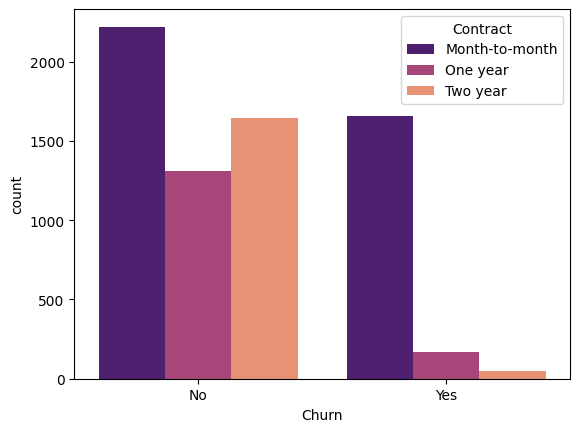

In [28]:
# Churn by Contract Type: Compares churn rates across different contract types.
sns.countplot(x="Churn", data=tr, palette="magma", legend=True, stat='count', hue="Contract", width=0.8, dodge=1)

## Tenure Distribution

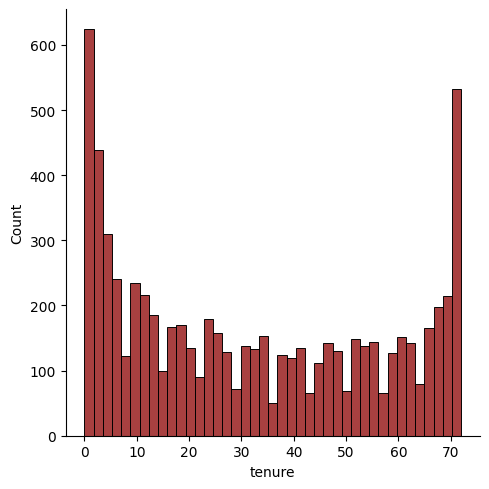

In [67]:
#Plots the distribution of tenure among customers using a histogram.
sns.displot(tr["tenure"], kde=False, color="darkred", bins=41)

## Tenure Upon the type of the Contract

<Axes: xlabel='tenure', ylabel='count'>

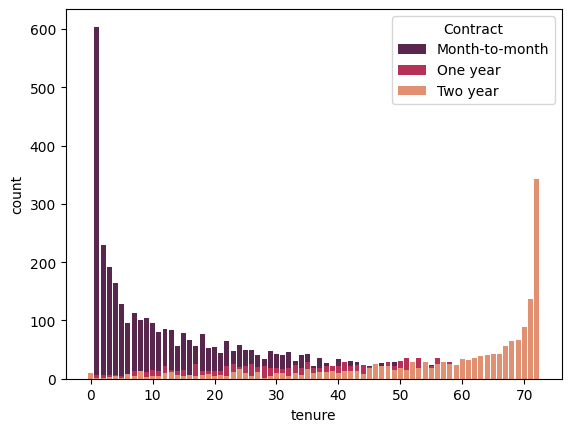

In [74]:
# Tenure by Contract Type: Shows the count of customers in each tenure category, categorized by contract type.
sns.countplot(x="tenure", data=tr, palette="rocket", native_scale=True, hue="Contract", dodge=0)

## Churn Distribuition 

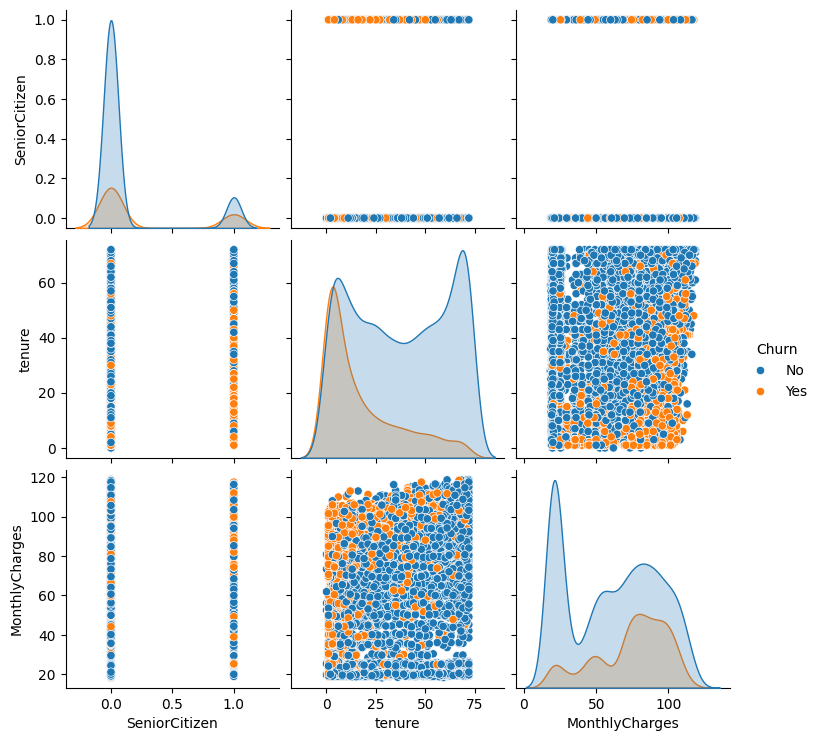

In [31]:
# Pairplot with Churn: Creates pairwise plots for all numerical variables in the dataset, colored by churn status.
sns.pairplot(tr, hue="Churn")

## Churn Distribution w.r.t MonthlyCharges

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

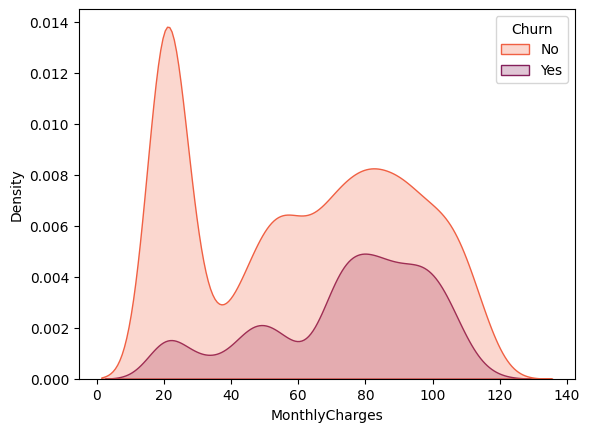

In [32]:
#Kernel density estimation plot showing distribution of monthly charges, split by churn status.
sns.kdeplot(data=tr, x='MonthlyCharges', fill=True, palette="rocket_r", hue="Churn")

## Churn Distribution w.r.t TotalCharges

<Axes: xlabel='TotalCharges', ylabel='Density'>

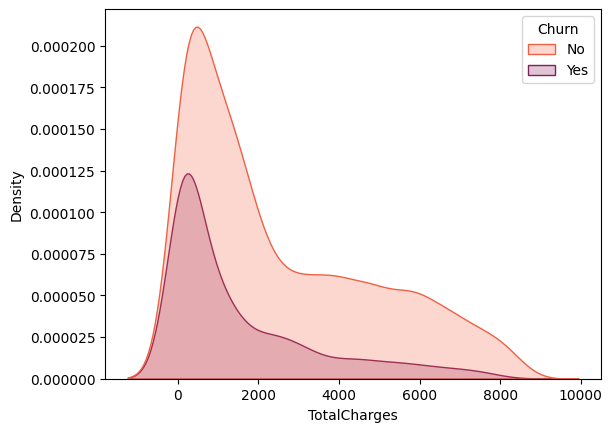

In [33]:
# KDE of Total Charges by Churn: Kernel density plot for total charges, differentiated by churn status.
sns.kdeplot(data=df, x='TotalCharges', fill=True, palette="rocket_r", hue="Churn")

## Relation between MonthlyCharges and TotalCharges

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

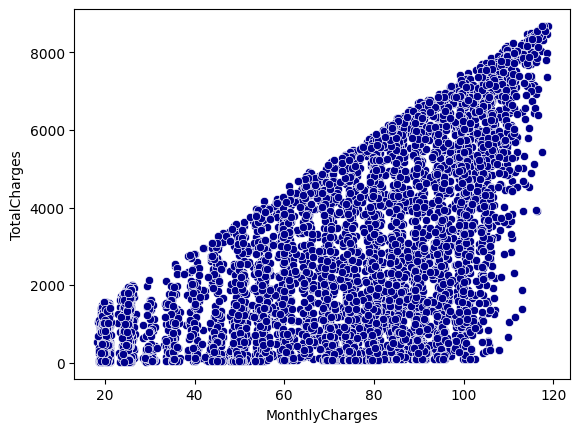

In [34]:
# Scatter Plot of Monthly vs Total Charges: Displays a scatter plot comparing monthly charges and total charges.
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", color="darkblue")

## Tenure Vs Churn

<Axes: xlabel='Churn', ylabel='tenure'>

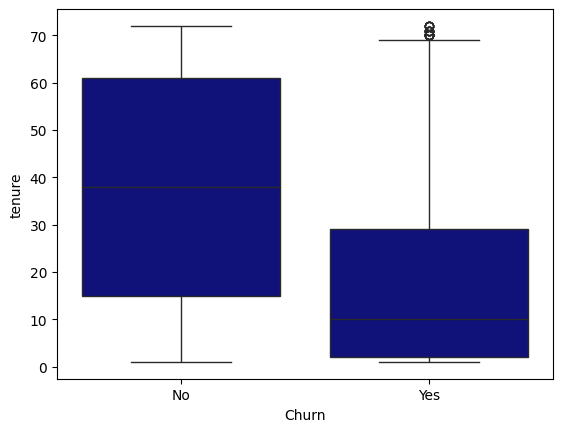

In [76]:
# Boxplot of Tenure by Churn: Boxplot showing the distribution of tenure among churned and non-churned customers.
sns.boxplot(data=df, x="Churn", y="tenure", color="darkblue")

# Categorical to Numerical

In [93]:
# Defining binary and multi-class categorical columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

multiclass_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                   'Contract', 'PaymentMethod']

# Binary encoding for binary columns
binary_mappings = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}
for col in binary_cols:
    df[col] = df[col].map(binary_mappings).astype('int8')

# Separately encode the target variable 'Churn'
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype('int8')

# Apply one-hot encoding to multi-class categorical columns in 'df' to prepare for machine learning modeling
data_encoded = pd.get_dummies(df, columns=multiclass_cols, drop_first=True)

# Display the first few rows of the updated encoded dataset
data_encoded.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


In [94]:
dt4 = data_encoded
dt4

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,1,0,1,1,24,1,1,84.80,1990.50,...,True,False,True,False,True,True,False,False,False,True
7028,2234-XADUH,0,0,1,1,72,1,1,103.20,7362.90,...,False,False,True,False,True,True,False,True,False,False
7029,4801-JZAZL,0,0,1,1,11,0,1,29.60,346.45,...,False,False,False,False,False,False,False,False,True,False
7030,8361-LTMKD,1,1,1,0,4,1,1,74.40,306.60,...,False,False,False,False,False,False,False,False,False,True


In [96]:
# Delete this cell it is just for Ahmed Gad
dt4 = pd.read_csv(r'D:\Materials\Materials  o6u\LEVEL 3 AI Specialization\Semester 1\AI\Final Project\test.csv')
dt4

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,7590-VHVEG,0,0,1,0,1,0,1,29.85,...,0,0,0,0,0,0,0,0,1,0
1,1,5575-GNVDE,1,0,0,0,34,1,0,56.95,...,0,0,0,0,0,1,0,0,0,1
2,2,3668-QPYBK,1,0,0,0,2,1,1,53.85,...,0,0,0,0,0,0,0,0,0,1
3,3,7795-CFOCW,1,0,0,0,45,0,0,42.30,...,1,0,0,0,0,1,0,0,0,0
4,4,9237-HQITU,0,0,0,0,2,1,1,70.70,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7027,6840-RESVB,1,0,1,1,24,1,1,84.80,...,1,0,1,0,1,1,0,0,0,1
7028,7028,2234-XADUH,0,0,1,1,72,1,1,103.20,...,0,0,1,0,1,1,0,1,0,0
7029,7029,4801-JZAZL,0,0,1,1,11,0,1,29.60,...,0,0,0,0,0,0,0,0,1,0
7030,7030,8361-LTMKD,1,1,1,0,4,1,1,74.40,...,0,0,0,0,0,0,0,0,0,1


In [97]:
# now lets drop the column that is not needed (customer ID , Unnamed 0) or that will make some problems in modeling the dataset or repetive
dt4 = dt4.drop(['customerID','Unnamed: 0'], axis=1)
dt4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   PaperlessBilling                       7032 non-null   int64  
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int64  
 10  MultipleLines_No phone service         7032 non-null   int64  
 11  Mult

In [41]:
# Showing the dtaframe after dropping The columns
dt4

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24,1,1,84.80,1990.50,0,...,1,0,1,0,1,1,0,0,0,1
7028,0,0,1,1,72,1,1,103.20,7362.90,0,...,0,0,1,0,1,1,0,1,0,0
7029,0,0,1,1,11,0,1,29.60,346.45,0,...,0,0,0,0,0,0,0,0,1,0
7030,1,1,1,0,4,1,1,74.40,306.60,1,...,0,0,0,0,0,0,0,0,0,1


In [42]:
# we need to adjust this feature because the proportions of the data are not scattered with such a large difference in values
# this can cause an issue with the performance of your models 

# Importing MinMaxScaler for feature scaling
from sklearn.preprocessing import MinMaxScaler

# Extracting the 'TotalCharges' column from the dataset
original_data = dt4['TotalCharges']

# Converting 'TotalCharges' values into a list of lists, as required by MinMaxScaler
original_data = [[value] for value in original_data]

# Initializing the MinMaxScaler. The feature_range is set to (1, 100) to scale 'TotalCharges' values between 1 and 100
scaler = MinMaxScaler(feature_range=(1, 100))

# Applying MinMaxScaler to the 'TotalCharges' data
scaled_data = scaler.fit_transform(original_data)

# Flattening the scaled data back into a list from a list of lists
scaled_values = [value[0] for value in scaled_data]

# Updating the 'TotalCharges' column in the dataset with the scaled values
dt4['TotalCharges'] = scaled_values

# Printing the updated 'TotalCharges' column to verify the scaling
print(dt4['TotalCharges'])

0        1.126235
1       22.370794
2        2.020730
3       21.813876
4        2.517673
          ...    
7027    23.524613
7028    84.898673
7029     4.743059
7030     4.287814
7031    78.976494
Name: TotalCharges, Length: 7032, dtype: float64


In [43]:
dt4["TotalCharges"].describe()

count    7032.000000
mean       26.869553
std        25.895496
min         1.000000
25%         5.371377
50%        16.749922
75%        44.136143
max       100.000000
Name: TotalCharges, dtype: float64

In [79]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Preparing the dataset: separate features and target variable
features = dt4.drop('Churn', axis=1)  # Independent variables (excluding 'Churn')
target = dt4['Churn']                 # Dependent variable (target for prediction)

# Splitting the dataset into training and testing sets
# 20% of data is used for testing, 80% for training. Random state ensures reproducible splits
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=12)

# Initializing the KNN classifier with 179 neighbors
knn = KNeighborsClassifier(n_neighbors=179)

# Training the KNN classifier on the training data
knn.fit(X_train, y_train)

# Making predictions on the test dataset
y_pred = knn.predict(X_test)

# Printing the confusion matrix to evaluate the performance of the classification
print(confusion_matrix(y_test, y_pred))

[[967  95]
 [191 154]]


In [80]:
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.7967306325515281


In [46]:
# Calculate accuracy
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1062
           1       0.62      0.42      0.50       345

    accuracy                           0.79      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.78      0.79      0.78      1407



In [81]:
# figuring the best number of neighbors for best performance model

# Initialize an empty list to hold error rates for different values of K
error_rate = []

# Loop over a range of K values from 1 to 199
for i in range(1, 200):
    # Initialize the KNN classifier with the current number of neighbors (i)
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # Train the KNN model using the training dataset
    knn.fit(X_train, y_train)
    
    # Make predictions on the test dataset
    pred_i = knn.predict(X_test)
    
    # Calculate the error rate (mean of incorrect predictions) and append it to the error_rate list
    error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Rate')

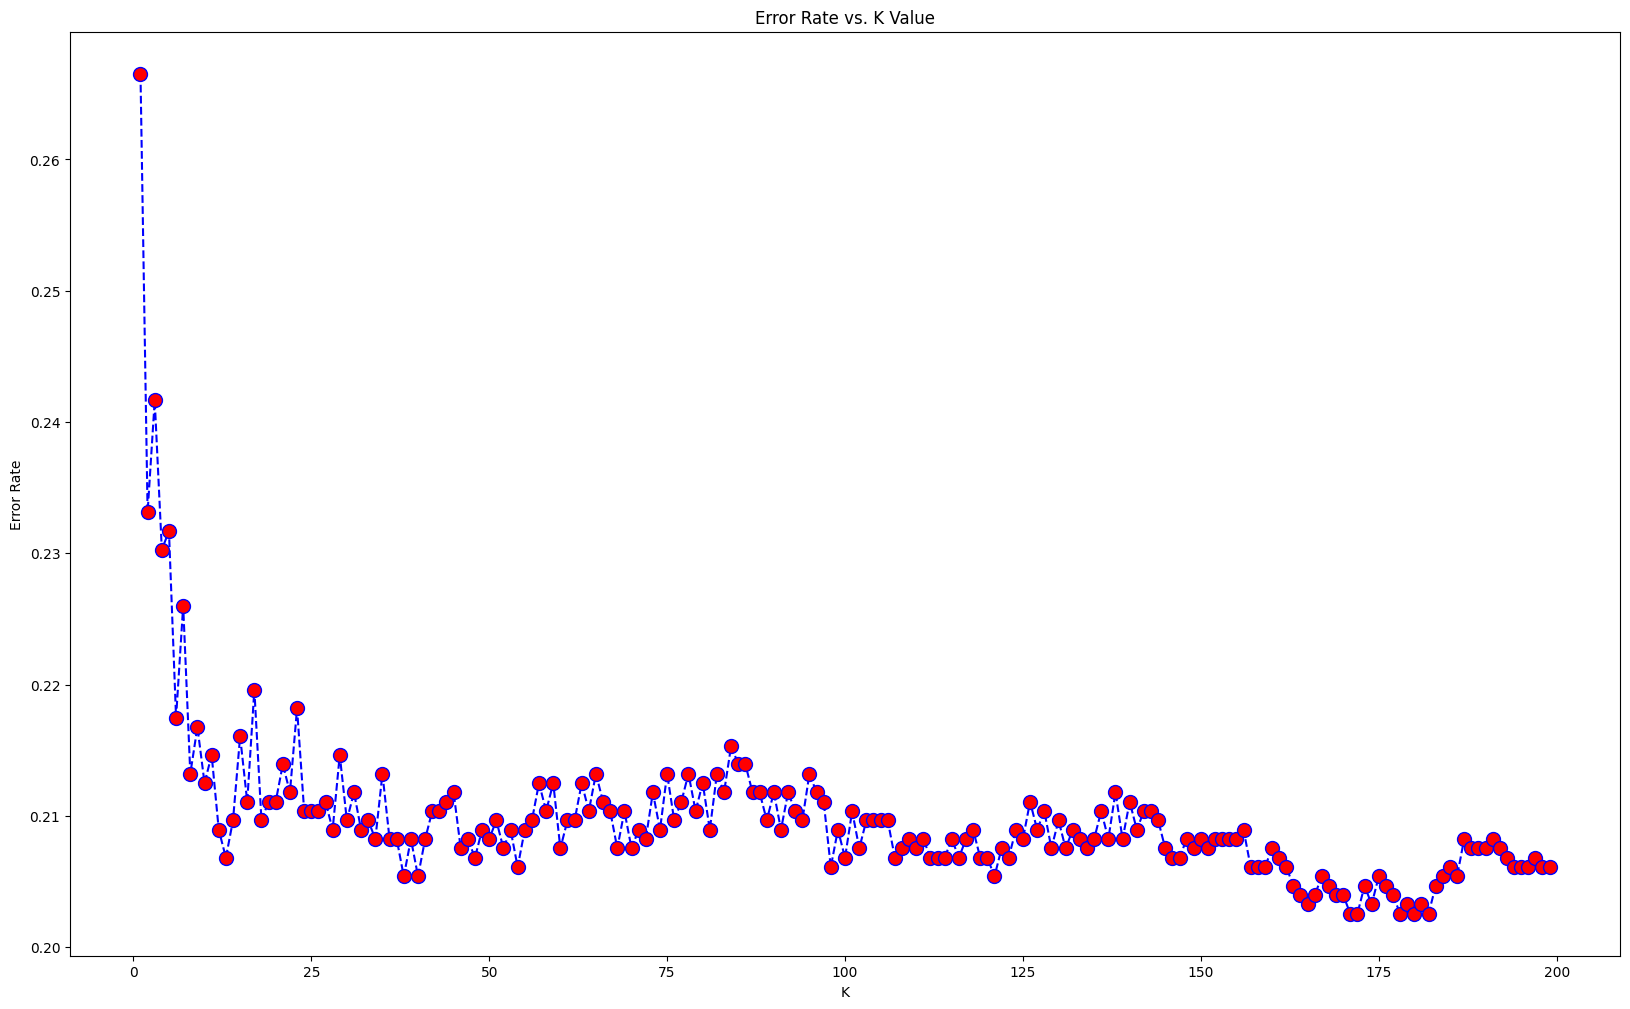

In [48]:
# Setting up the figure size for the plot
plt.figure(figsize=(20,12))
# Plotting the error rates for K values ranging from 1 to 199
# - The X-axis represents different values of K.
# - The Y-axis represents the corresponding error rate for each K value.
# - The plot style is configured with a blue dashed line and red circular markers for points.
plt.plot(range(1,200), error_rate ,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
# Setting the title of the plot
plt.title('Error Rate vs. K Value')

# Labeling the X-axis as 'K'
plt.xlabel('K')

# Labeling the Y-axis as 'Error Rate'
plt.ylabel('Error Rate')

In [49]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load your dataset and split into features and target variable
# Preparing the dataset: separate into features and target variable
features = dt4.drop('Churn', axis=1)  # Independent variables
target = dt4['Churn']                 # Dependent variable (target for prediction)

# Splitting the dataset into training and testing sets
# 20% of data is used for testing, 80% for training. Random state ensures reproducible splits
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=101)

# Setting up the RandomForestClassifier with specific parameters
# n_estimators: number of trees in the forest
# max_leaf_nodes: grow trees with max_leaf_nodes in best-first fashion
rf = RandomForestClassifier(n_estimators=60, max_leaf_nodes=30)

# Training the RandomForest model on the training data
rf.fit(x_train, y_train)

# Making predictions on the test dataset
y_pred = rf.predict(x_test)

# Printing the confusion matrix to evaluate the performance of the classification
print(confusion_matrix(y_test, y_pred))

[[970  82]
 [185 170]]


In [50]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8102345415778252

In [51]:
# Calculate accuracy
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1052
           1       0.67      0.48      0.56       355

    accuracy                           0.81      1407
   macro avg       0.76      0.70      0.72      1407
weighted avg       0.80      0.81      0.80      1407



In [ ]:
# Initialize an empty list to store error rates for different numbers of estimators
error_rate = []

# Loop over a range of values for n_estimators (from 1 to 999 in this case)
# The loop will iterate and calculate the error rate for each number of trees in the RandomForest
for i in range(1, 1000):
    
    # Initialize the RandomForest model with the current number of trees (i)
    rf = RandomForestClassifier(n_estimators=i)

    # Train the RandomForest model on the training data
    rf.fit(x_train, y_train)

    # Make predictions on the test data
    pred_i = rf.predict(x_test)

    # Calculate the mean error rate for the current number of trees and append it to the error_rate list
    # The error rate is the average of instances where predictions don't match the actual test values
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
# Setting up the figure size for the plot (30 units wide, 18 units tall)
plt.figure(figsize=(30,18))

# Plotting the error rates for different numbers of trees (n_estimators) in the RandomForest
# The x-axis represents different values of n_estimators (from 1 to 999).
# The y-axis represents the corresponding error rate for each number of trees.
# The plot uses a blue dashed line and red circular markers for each point.
plt.plot(range(1,1000), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

# Setting the title of the plot to 'Error Rate vs. RF Value'
plt.title('Error Rate vs. RF Value')

# Labeling the x-axis as 'RF' to represent the number of trees in the RandomForest
plt.xlabel('RF')

# Labeling the y-axis as 'Error Rate' to represent the error rate of the model
plt.ylabel('Error Rate')

# Displaying the plot
plt.show()